In [1]:
import numpy as np
import matplotlib.pyplot as plt

from hfnet.datasets.hpatches import Hpatches
from hfnet.evaluation.loaders import sift_loader, export_loader, fast_loader, harris_loader
from hfnet.evaluation.local_descriptors import evaluate
from hfnet.utils import tools

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [8]:
data_config = {'make_pairs': True, 'shuffle': True}
dataset = Hpatches(**data_config)

In [26]:
all_configs = {
    'sift': {
        'predictor': sift_loader,
        'root': True,
    },
    'superpoint': {
        'experiment': 'super_point_pytorch/hpatches',
        'predictor': export_loader,
        'do_nms': True,
        'nms_thresh': 4,
        'remove_borders': 4,
    },
    'superpoint_harris-kpts': {
        'experiment': 'super_point_pytorch/hpatches',
        'predictor': export_loader,
        'keypoint_predictor': harris_loader,
        'keypoint_config': {
            'do_nms': True,
            'nms_thresh': 4,
        },
    },
    'netvlad_conv3-3': {
        'experiment': 'netvlad/hpatches',
        'predictor': export_loader,
        'keypoint_predictor': export_loader,
        'keypoint_config': {
            'experiment': 'super_point_pytorch/hpatches',
            'do_nms': True,
            'nms_thresh': 4,
            'remove_borders': 4,
        },
        'binarize': False,
    },
    'lfnet': {
        'experiment': 'lfnet/hpatches_kpts-500',
        'predictor': export_loader,
    },
}
eval_config = {
    'num_features': 300,
    'do_ratio_test': True,
    'correct_match_thresh': 3,
    'correct_H_thresh': 3,
}

In [ ]:
methods = ['sift', 'lfnet', 'superpoint', 'superpoint_harris-kpts', 'netvlad_conv3-3']
configs = {m: all_configs[m] for m in methods}
pose_recalls, nn_pr = {}, {}
for method, config in configs.items():
    config = tools.dict_update(config, eval_config)
    data_iter = dataset.get_test_set()
    metrics, nn_precision, nn_recall, distances, pose_recall = evaluate(data_iter, config, is_2d=True)
    
    print('> {}'.format(method))
    for k, v in metrics.items():
        print('{:<25} {:.3f}'.format(k, v))
    print(config)
    
    pose_recalls[method] = pose_recall
    nn_pr[method] = (nn_precision, nn_recall, distances)

In [27]:
# NMS=4, N=300

580it [03:36,  3.31it/s]
0it [00:00, ?it/s]

> sift
average_num_keypoints     300.000
matching_score            0.307
pose_correctness          0.681
mAP                       0.651
{'predictor': <function sift_loader at 0x2acd1899bbf8>, 'root': True, 'num_features': 300, 'do_ratio_test': True, 'correct_match_thresh': 3, 'correct_H_thresh': 3}


580it [01:20,  7.20it/s]
0it [00:00, ?it/s]

> lfnet
average_num_keypoints     300.000
matching_score            0.305
pose_correctness          0.629
mAP                       0.572
{'experiment': 'lfnet/hpatches_kpts-500', 'predictor': <function export_loader at 0x2acd189ad7b8>, 'num_features': 300, 'do_ratio_test': True, 'correct_match_thresh': 3, 'correct_H_thresh': 3}


580it [01:53, 10.67it/s]
0it [00:00, ?it/s]

> superpoint
average_num_keypoints     298.055
matching_score            0.441
pose_correctness          0.810
mAP                       0.846
{'experiment': 'super_point_pytorch/hpatches', 'predictor': <function export_loader at 0x2acd189ad7b8>, 'do_nms': True, 'nms_thresh': 4, 'remove_borders': 4, 'num_features': 300, 'do_ratio_test': True, 'correct_match_thresh': 3, 'correct_H_thresh': 3}


580it [03:47,  3.61it/s]
0it [00:00, ?it/s]

> superpoint_harris-kpts
average_num_keypoints     298.979
matching_score            0.448
pose_correctness          0.669
mAP                       0.737
{'experiment': 'super_point_pytorch/hpatches', 'predictor': <function export_loader at 0x2acd189ad7b8>, 'keypoint_predictor': <function harris_loader at 0x2acd189ad730>, 'keypoint_config': {'do_nms': True, 'nms_thresh': 4, 'keypoint_predictor': None}, 'num_features': 300, 'do_ratio_test': True, 'correct_match_thresh': 3, 'correct_H_thresh': 3}


580it [03:51,  3.29it/s]

> netvlad_conv3-3
average_num_keypoints     298.055
matching_score            0.419
pose_correctness          0.788
mAP                       0.798
{'experiment': 'netvlad/hpatches', 'predictor': <function export_loader at 0x2acd189ad7b8>, 'keypoint_predictor': <function export_loader at 0x2acd189ad7b8>, 'keypoint_config': {'experiment': 'super_point_pytorch/hpatches', 'do_nms': True, 'nms_thresh': 4, 'remove_borders': 4, 'keypoint_predictor': None}, 'binarize': False, 'num_features': 300, 'do_ratio_test': True, 'correct_match_thresh': 3, 'correct_H_thresh': 3}


In [22]:
# NMS=8, N=500

580it [03:48,  3.03it/s]
0it [00:00, ?it/s]

> sift
average_num_keypoints     499.885
matching_score            0.311
pose_correctness          0.722
mAP                       0.632
{'predictor': <function sift_loader at 0x2acd1899bbf8>, 'root': True, 'num_features': 500, 'do_ratio_test': True, 'correct_match_thresh': 3, 'correct_H_thresh': 3}


580it [01:28,  6.53it/s]
0it [00:00, ?it/s]

> lfnet
average_num_keypoints     500.000
matching_score            0.300
pose_correctness          0.652
mAP                       0.528
{'experiment': 'lfnet/hpatches_kpts-500', 'predictor': <function export_loader at 0x2acd189ad7b8>, 'num_features': 500, 'do_ratio_test': True, 'correct_match_thresh': 3, 'correct_H_thresh': 3}


580it [01:51,  9.72it/s]
0it [00:00, ?it/s]

> superpoint
average_num_keypoints     464.888
matching_score            0.470
pose_correctness          0.810
mAP                       0.823
{'experiment': 'super_point_pytorch/hpatches', 'predictor': <function export_loader at 0x2acd189ad7b8>, 'do_nms': True, 'nms_thresh': 8, 'remove_borders': 4, 'num_features': 500, 'do_ratio_test': True, 'correct_match_thresh': 3, 'correct_H_thresh': 3}


580it [04:56,  3.47it/s]
0it [00:00, ?it/s]

> superpoint_harris-kpts
average_num_keypoints     477.905
matching_score            0.422
pose_correctness          0.728
mAP                       0.777
{'experiment': 'super_point_pytorch/hpatches', 'predictor': <function export_loader at 0x2acd189ad7b8>, 'keypoint_predictor': <function harris_loader at 0x2acd189ad730>, 'keypoint_config': {'do_nms': True, 'nms_thresh': 8, 'keypoint_predictor': None}, 'num_features': 500, 'do_ratio_test': True, 'correct_match_thresh': 3, 'correct_H_thresh': 3}


580it [05:27,  2.39it/s]

> netvlad_conv3-3
average_num_keypoints     464.888
matching_score            0.436
pose_correctness          0.803
mAP                       0.769
{'experiment': 'netvlad/hpatches', 'predictor': <function export_loader at 0x2acd189ad7b8>, 'keypoint_predictor': <function export_loader at 0x2acd189ad7b8>, 'keypoint_config': {'experiment': 'super_point_pytorch/hpatches', 'do_nms': True, 'nms_thresh': 8, 'remove_borders': 4, 'keypoint_predictor': None}, 'binarize': False, 'num_features': 500, 'do_ratio_test': True, 'correct_match_thresh': 3, 'correct_H_thresh': 3}


In [ ]:
error_names = list(list(pose_recalls.values())[0].keys())
expers = list(pose_recalls.keys())
lim = {'homography': 7}
thresh = {'homography': [1, 3, 5]}

f, axes = plt.subplots(1, len(error_names), figsize=(8, 4), dpi=150)
if len(error_names) == 1:
    axes = [axes]
for error_name, ax in zip(error_names, axes):
    for exper in expers:
        steps, recall = pose_recalls[exper][error_name]
        ax.set_xlim([0, lim[error_name]])
        ax.plot(steps, recall*100, label=exper);
        
        s = f'{error_name:^15} {exper:^25}'
        s += ''.join([f' {t:^5}: {recall[np.where(steps>t)[0].min()]:.2f} ' for t in thresh[error_name]])
        print(s)
        
    ax.grid(color=[0.85]*3);
    ax.set_xlabel(error_name+' error');
    ax.set_ylabel('Correctly localized queries (%)');
    ax.legend(loc=4); 
plt.tight_layout()
plt.gcf().subplots_adjust(left=0);

  homography              sift              1  : 0.40    3  : 0.68    5  : 0.75 
  homography              lfnet             1  : 0.34    3  : 0.63    5  : 0.72 
  homography           superpoint           1  : 0.48    3  : 0.81    5  : 0.87 
  homography     superpoint_harris-kpts     1  : 0.33    3  : 0.67    5  : 0.77 
  homography         netvlad_conv3-3        1  : 0.51    3  : 0.79    5  : 0.85 


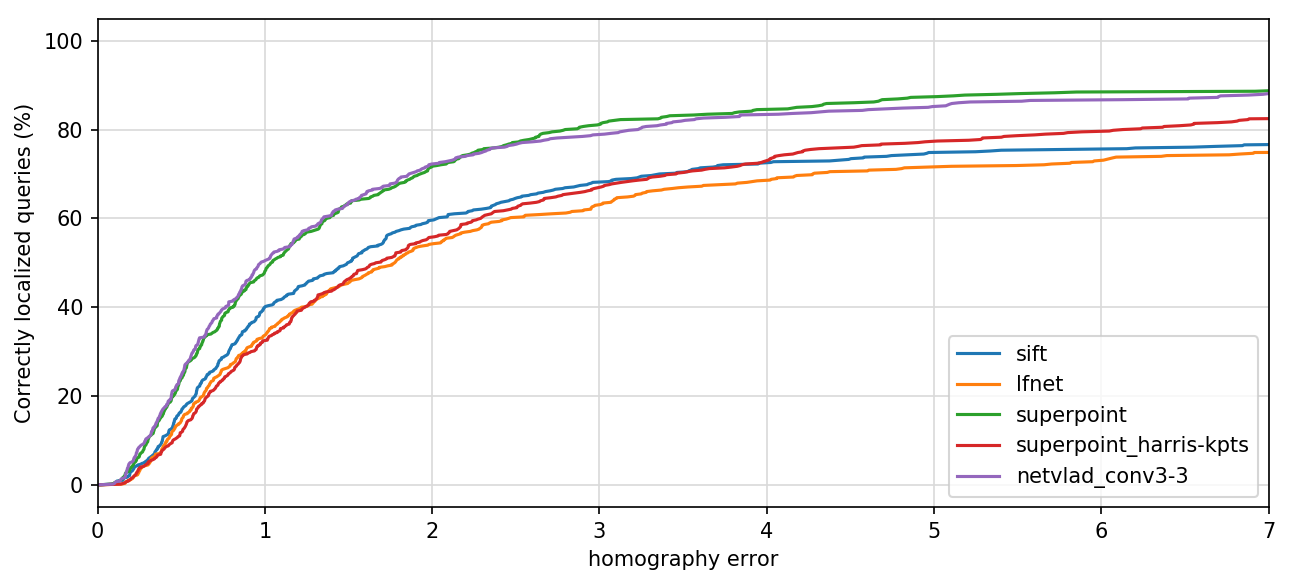

In [28]:
# NMS=4, N=300

  homography              sift              1  : 0.45    3  : 0.72    5  : 0.77 
  homography              lfnet             1  : 0.36    3  : 0.65    5  : 0.72 
  homography           superpoint           1  : 0.49    3  : 0.81    5  : 0.88 
  homography     superpoint_harris-kpts     1  : 0.35    3  : 0.73    5  : 0.83 
  homography         netvlad_conv3-3        1  : 0.51    3  : 0.81    5  : 0.88 


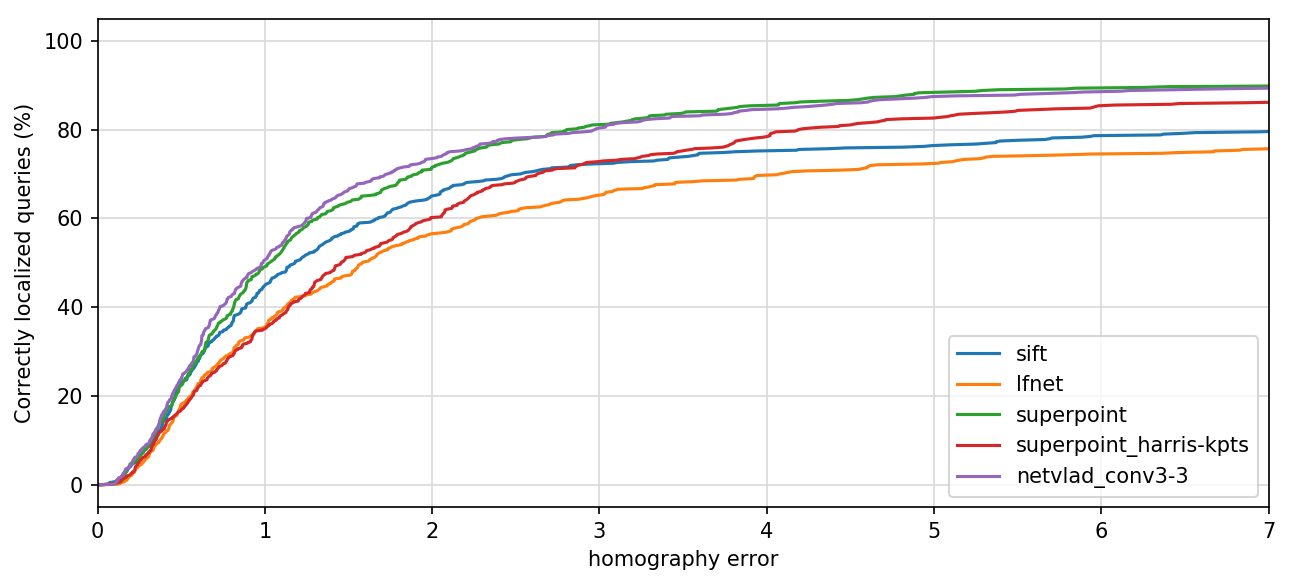

In [25]:
# NMS=8, N=500